In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from IPython.display import clear_output
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

clear_output()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib .pyplot as plt
import numpy as np
import PIL
import PIL.Image
import pathlib

from keras.preprocessing.image import load_img
from keras.layers import Dense,Dropout,MaxPool2D,Flatten,Conv2D,BatchNormalization,Activation
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_dir = 'fer2013/train'
test_dir = 'fer2013/test'

In [3]:
print(os.path.join(train_dir + '/angry'))

fer2013/train/angry


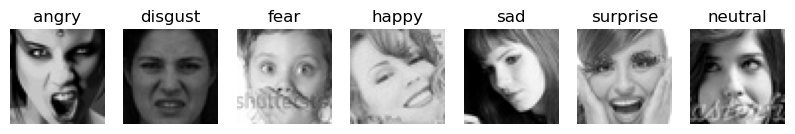

In [4]:
# Define the default image size.
img_size = 48

# Define the seven emotions provided in dataset.
classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Plot the images with each distinct emotions.
plt.figure(figsize=(10,10))
i = 1

for expression in classes:
#     print((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/' + expression)[1]))
    img = load_img((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/' + expression)[7]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [5]:
image_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(rescale = 1./255)
datagen_test = ImageDataGenerator(rescale = 1./255)

In [7]:

# Training data.
train_set = datagen_train.flow_from_directory(directory=train_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=True
                                              )

# Validation data.
test_set = datagen_train.flow_from_directory(directory=test_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=False
                                              )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Building a CNN Model

In [44]:
# 2 Convolution Layer 1 Dense Layer
model1 = Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(7,activation='softmax')
])

model1.compile(optimizer='adam',loss="categorical_crossentropy", metrics=['accuracy'])

model1.fit(train_set, epochs=10, batch_size=batch_size, validation_data=test_set)

Epoch 1/10
  4/449 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.1055 - loss: 1.9404

W0000 00:00:1720497460.320623     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


447/449 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2924 - loss: 1.7431

W0000 00:00:1720497487.620920     159 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


449/449 ━━━━━━━━━━━━━━━━━━━━ 36s 74ms/step - accuracy: 0.2928 - loss: 1.7425 - val_accuracy: 0.4181 - val_loss: 1.5272
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.4410 - loss: 1.4671 - val_accuracy: 0.4769 - val_loss: 1.3940
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.4936 - loss: 1.3469 - val_accuracy: 0.4883 - val_loss: 1.3459
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 36s 79ms/step - accuracy: 0.5191 - loss: 1.2757 - val_accuracy: 0.4909 - val_loss: 1.3332
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.5479 - loss: 1.2091 - val_accuracy: 0.5130 - val_loss: 1.2957
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.5698 - loss: 1.1643 - val_accuracy: 0.5174 - val_loss: 1.2860
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.5856 - loss: 1.1224 - val_accuracy: 0.5146 - val_loss: 1.2852
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.5977 - loss: 1.0838 - val_accurac

In [45]:
model1_test_loss, model1_test_accuracy = model1.evaluate(test_set)
print(f"Test accuracy: {model1_test_accuracy}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.4927 - loss: 1.3685
Test accuracy: 0.5220116972923279


In [48]:
# 2 Convolution Layer 2 Dense Layer
model2 = Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(7,activation='softmax')
])

model2.compile(optimizer='adam',loss="categorical_crossentropy", metrics=['accuracy'])

model2.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=10,
    validation_data=test_set,
    batch_size=batch_size)

Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.3008 - loss: 1.7358 - val_accuracy: 0.4266 - val_loss: 1.4909
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4266 - val_loss: 1.4909
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.4406 - loss: 1.4481 - val_accuracy: 0.4719 - val_loss: 1.3551
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4719 - val_loss: 1.3551
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - accuracy: 0.5021 - loss: 1.2940 - val_accuracy: 0.5035 - val_loss: 1.2915
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5035 - val_loss: 1.2915
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.5389 - loss: 1.2106 - val_accuracy: 0.5074 - val_loss: 1.2785
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.00

In [49]:
model2_test_loss, model2_test_accuracy = model2.evaluate(test_set)
print(f"Test accuracy: {model2_test_accuracy}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.4549 - loss: 1.4051
Test accuracy: 0.516021192073822


In [52]:
# 4 Convolution Layers and 2 Dense Layers with Batch Normalization

# First layer
model3= tf.keras.models.Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model3.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

# Second layer
model3.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

# Third layer   
model3.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

# Fourth layer
model3.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256,activation = 'relu'))
model3.add(BatchNormalization())

# Second fully connected layer  
model3.add(Dense(512,activation = 'relu'))
model3.add(BatchNormalization())

model3.add(Dense(7, activation='softmax'))

model3.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [53]:
model3.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=15,
    validation_data=test_set)

Epoch 1/15
  4/449 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.1530 - loss: 2.6564

W0000 00:00:1720498243.824588     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


304/449 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.2542 - loss: 1.9995

W0000 00:00:1720498263.241889     157 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


447/449 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2749 - loss: 1.9245

W0000 00:00:1720498272.791911     157 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


449/449 ━━━━━━━━━━━━━━━━━━━━ 42s 79ms/step - accuracy: 0.2753 - loss: 1.9231 - val_accuracy: 0.3295 - val_loss: 1.7769
Epoch 2/15


W0000 00:00:1720498279.033509     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3295 - val_loss: 1.7769
Epoch 3/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.4817 - loss: 1.3601 - val_accuracy: 0.4592 - val_loss: 1.4731
Epoch 4/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4592 - val_loss: 1.4731
Epoch 5/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.5737 - loss: 1.1368 - val_accuracy: 0.5092 - val_loss: 1.3239
Epoch 6/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5092 - val_loss: 1.3239
Epoch 7/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.6329 - loss: 0.9820 - val_accuracy: 0.5571 - val_loss: 1.2646
Epoch 8/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5571 - val_loss: 1.2646
Epoch 9/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.7063 

In [55]:
model3_test_loss, model3_test_accuracy = model3.evaluate(test_set)
print(f"Test accuracy: {model3_test_accuracy}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.4912 - loss: 2.0212
Test accuracy: 0.5745332837104797


In [8]:
from tensorflow.keras.layers import * 

# Define the model architecture
model4 = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model4.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model4.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model4.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model4.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model4.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model4.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model4.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model4.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model4.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model4.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model4.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model4.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model4.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model4.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model4.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model4.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model4.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model4.add(Dropout(0.5))
model4.add(Dense(128, activation='relu')) # thapeko
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model4.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model4.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

2024-07-10 01:16:35.857272: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-07-10 01:16:35.857343: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-10 01:16:35.857354: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-10 01:16:35.857388: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-10 01:16:35.857411: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model4.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=50,
    validation_data=test_set)

Epoch 1/50


In [59]:
model4_test_loss, model4_test_accuracy = model4.evaluate(test_set)
print(f"Test accuracy: {model4_test_accuracy}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.5706 - loss: 1.4844
Test accuracy: 0.6214823126792908


In [63]:
model4.save("6Conv2Dense.h5")